In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [33]:
df = pd.read_csv('..\Initial_data\K5P110\K5P110_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_19348\439097030.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P110\K5P110_cor.csv', ";")


,K0P125.PV,K5Q2_2.PV,K5FCV4_2I.PV,K5P6.PV,K5PCV6I.PV,K5PCV17_1I.PV,K5P17_1.PV,K5PCV17_2I.PV,K5P17_2.PV,K5F3.PV,...,K5T12.PV,K5P13.PV,K5HCV60I.PV,K5P16_1.PV,K5GKAL.PV,K5HCV61I.PV,K5P16_2.PV,K5FCV4_1I.PV,K5Q2_1.PV,K5P4_1.PV
0,67.27675,327.7604,7.56724,0.7998179,94.63021,72.83281,5.713502,98.70692,5.543893,2106.518,...,152.0324,3.983025,97.38812,0.5320469,15.29541,97.78464,0.6049101,5.450104,368.9479,10.97927
1,67.65375,326.8594,7.536094,0.8002969,94.62411,72.83244,5.741667,98.69563,5.572396,2111.003,...,151.9718,3.981728,97.37245,0.5272148,15.3814,97.80542,0.6093216,5.453073,370.0990,11.02042
2,67.24300,324.4740,7.531302,0.8006054,94.61849,72.82568,5.678802,98.69583,5.515924,2099.278,...,151.9571,3.980113,97.40734,0.5339844,15.35248,97.83432,0.6084323,5.451042,368.3698,10.91922
3,67.69209,324.8229,7.550416,0.8002509,94.62698,72.85719,5.725313,98.69218,5.557461,2107.771,...,151.9323,3.979872,97.41817,0.5316745,15.33855,97.83901,0.6090326,5.426406,372.7656,10.99307
4,67.28242,325.9219,7.53724,0.800182,94.62495,72.84661,5.677773,98.69594,5.517148,2099.952,...,151.9283,3.978566,97.36542,0.5482396,15.33628,97.78313,0.6045873,5.448646,369.5052,10.91474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24475,66.38567,589.3802,19.43016,1.79951,97.58041,73.25438,11.74401,98.98515,11.44927,3074.687,...,176.0842,4.067581,97.51240,1.217788,21.52003,97.80813,1.35351,30.03682,632.7239,21.92401
24476,66.46909,590.7188,19.42036,1.80032,97.57104,73.26609,11.76387,98.98953,11.46695,3076.028,...,176.0089,4.063694,97.50407,1.245809,21.4593,97.82995,1.34471,30.06958,637.1042,21.94292
24477,66.58984,591.1406,19.41078,1.799762,97.57203,73.25245,11.79139,98.98568,11.49785,3080.769,...,176.0350,4.065034,97.51958,1.232027,21.45812,97.84521,1.346949,30.0425,636.3177,21.99427
24478,66.31067,589.1979,19.41703,1.799575,97.57005,73.24854,11.73013,98.98323,11.43488,3071.830,...,176.0854,4.068994,97.50943,1.244871,21.4981,97.79406,1.348514,30.05328,633.8906,21.88974


C:\Users\arufa\AppData\Local\Temp\ipykernel_19348\3345498128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

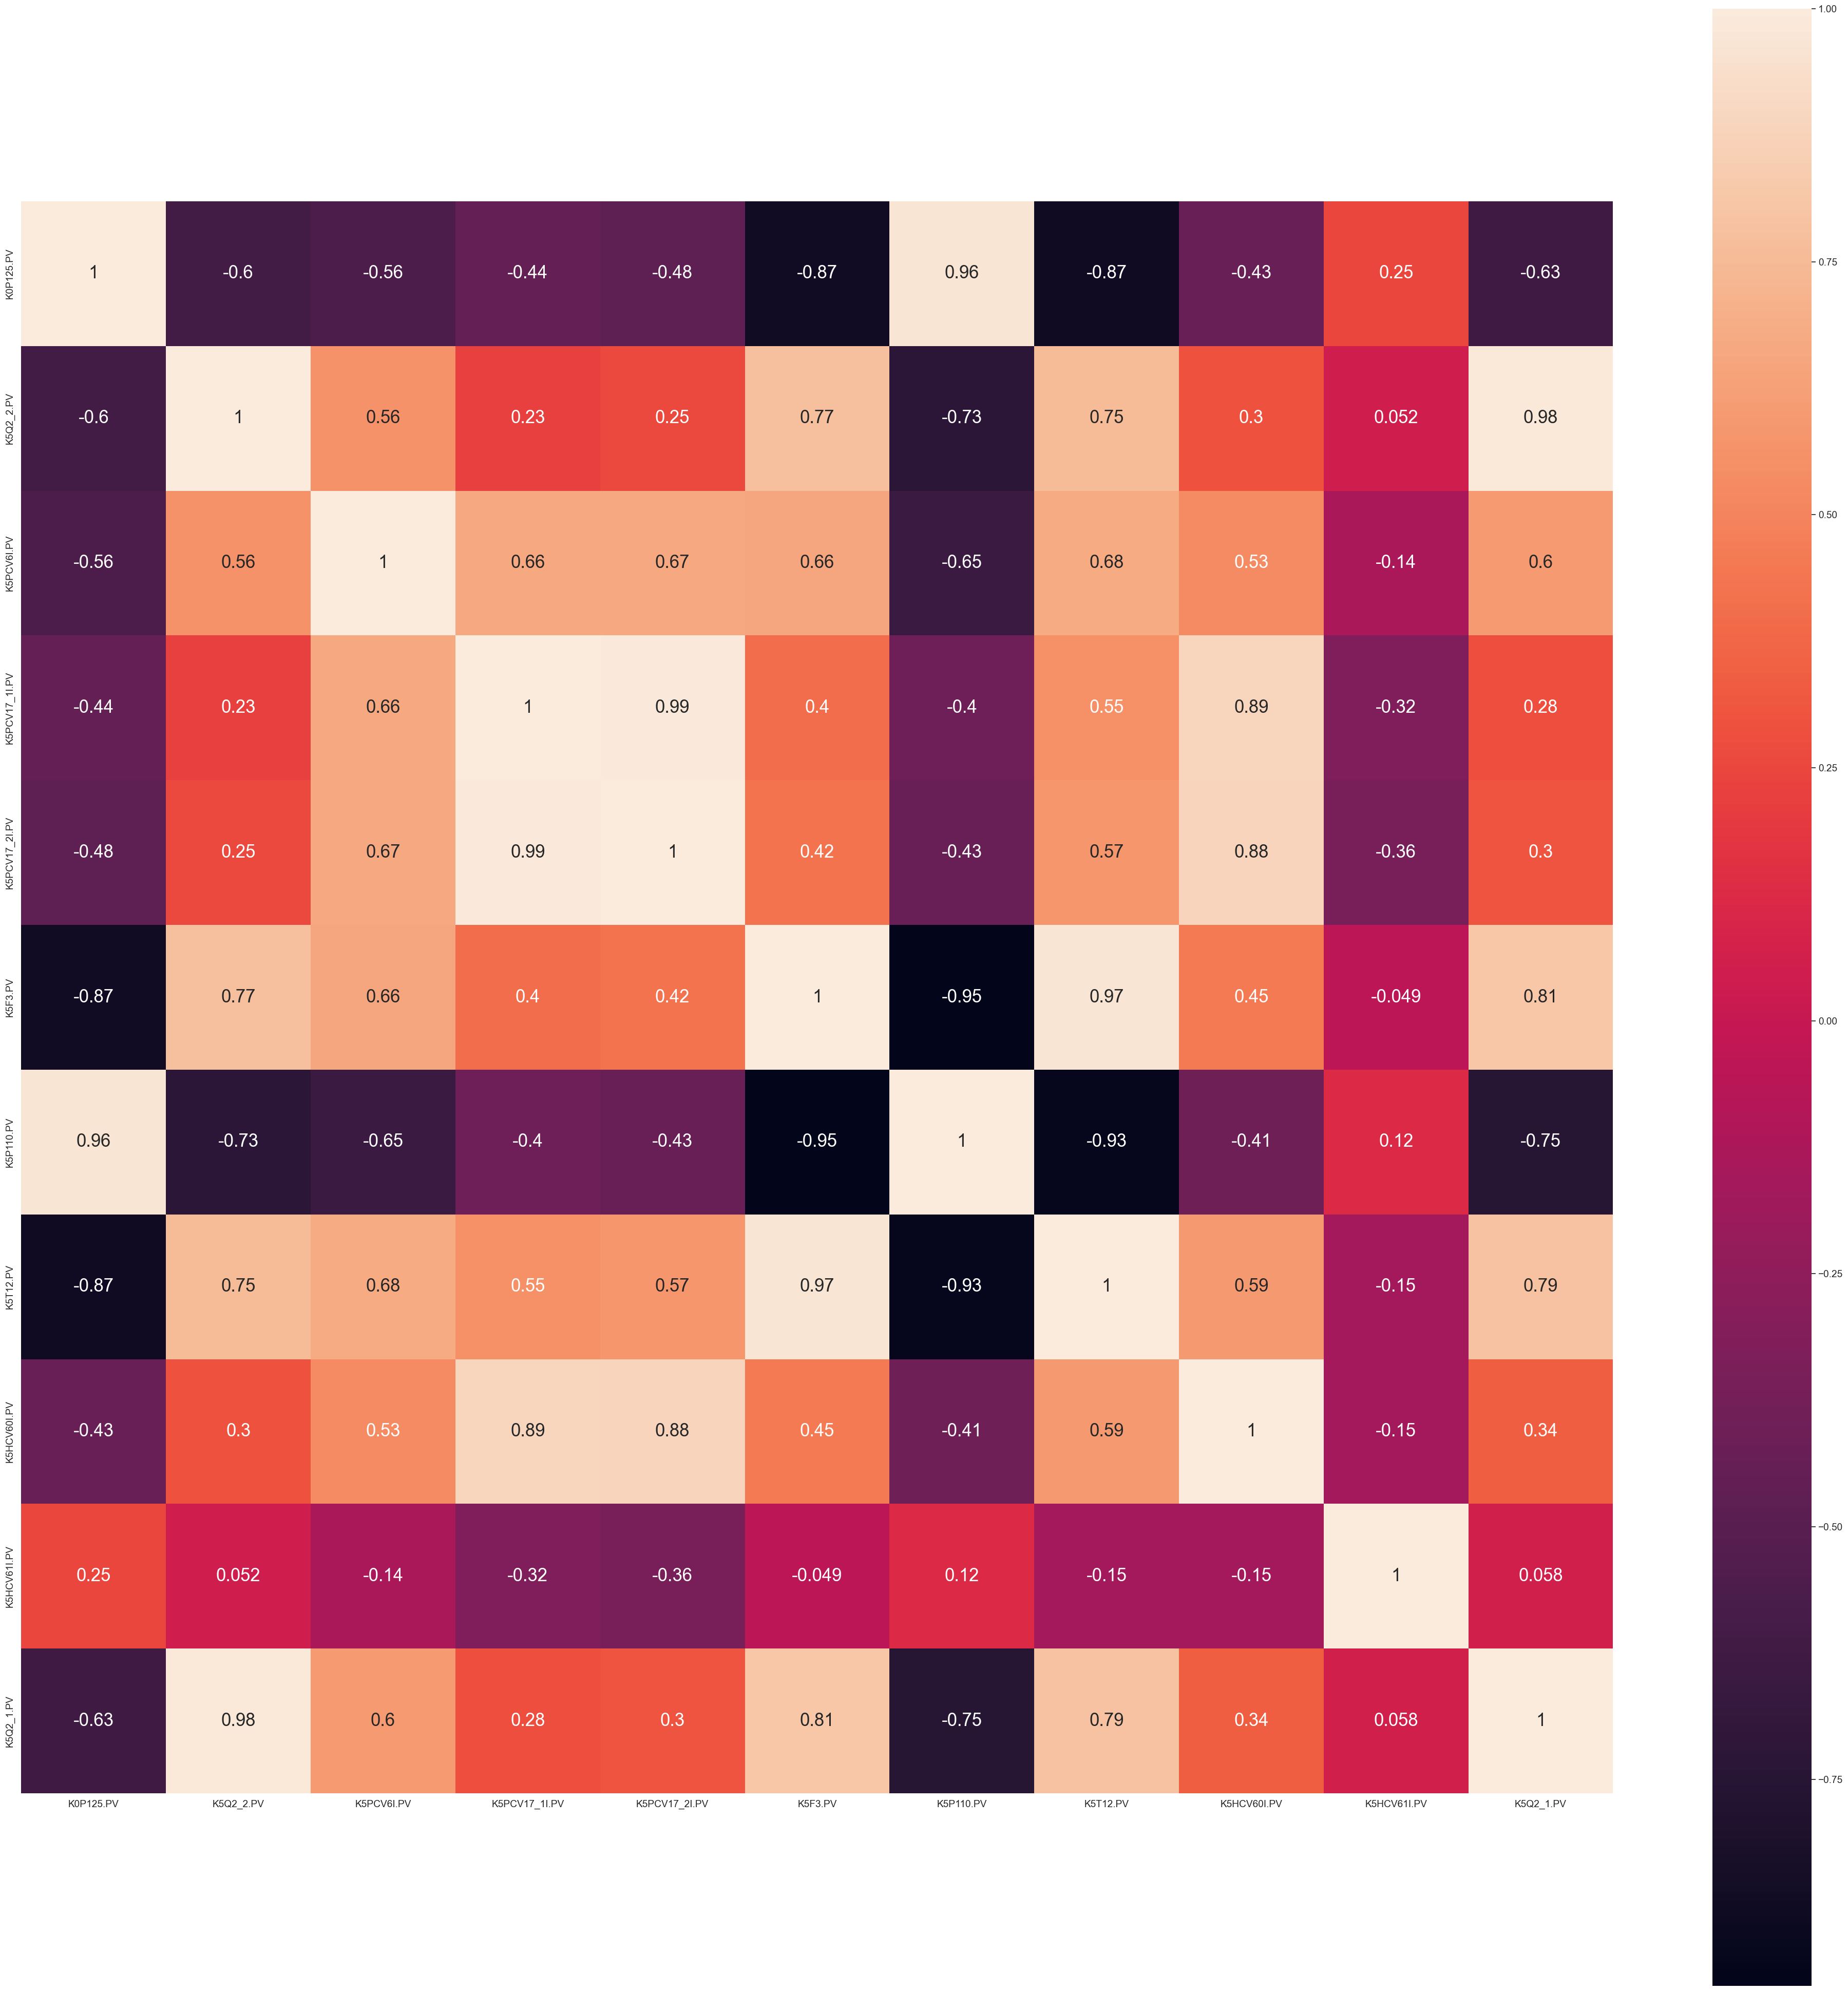

In [36]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [31]:
df = pd.read_csv('..\Initial_data\K5P110\K5P110.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_19348\1881035036.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P110\K5P110.csv', ";")


,K0P125.PV,K5P110.PV
0,68.95270,66.53107
1,68.89850,66.52406
2,68.81465,66.42445
3,68.87460,66.39922
4,68.93040,66.39844
...,...,...
124,66.53733,63.22790
125,66.65165,63.17867
126,66.87718,63.07931
127,66.58926,62.96270


In [6]:
df=df.dropna()
df=df.round(3)
df=df.drop_duplicates(["K0P125.PV"])
df=df.drop_duplicates(["K5P110.PV"])
df

,K0P125.PV,K5P110.PV
0,68.953,66.531
1,68.898,66.524
2,68.815,66.424
3,68.875,66.399
4,68.930,66.398
...,...,...
124,66.537,63.228
125,66.652,63.179
126,66.877,63.079
127,66.589,62.963


In [7]:
y = df.drop(['K0P125.PV'], axis=1)
x = df.drop(['K5P110.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(65, 70, 100)[:, np.newaxis] # Точки для предсказания

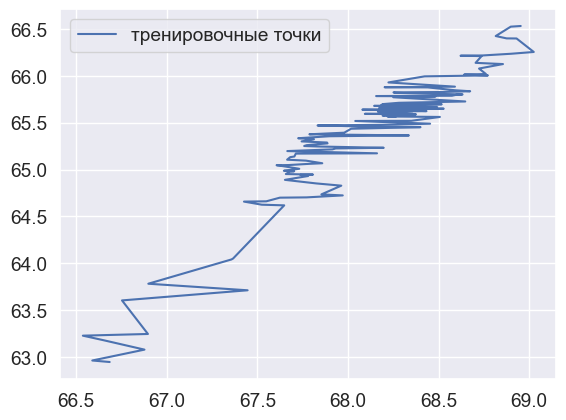

In [8]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


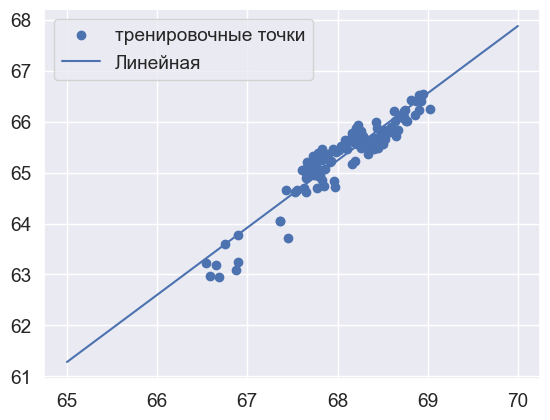

array([0.83571643, 0.84169631])

In [9]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=2)

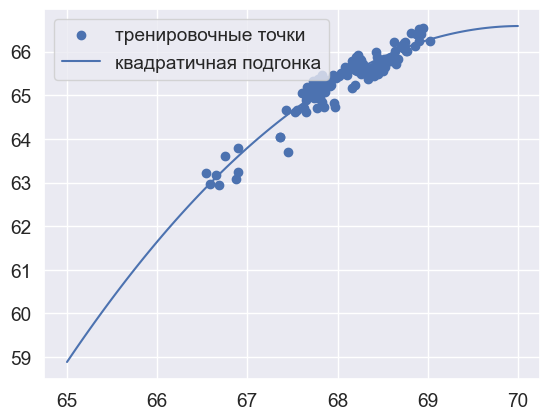

array([0.83571643, 0.84169631])

In [11]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=2)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


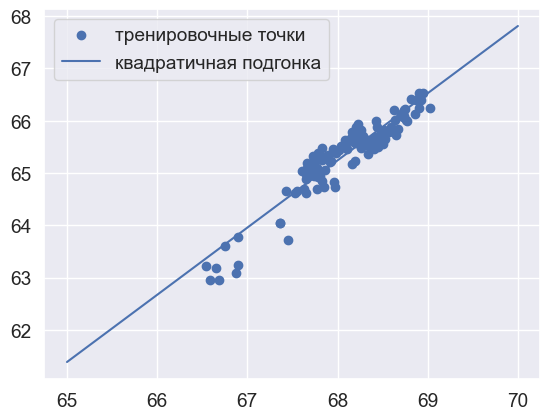

0.8512367268228453

In [10]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
y_pr=clf.predict(task)
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
clf.score(X_test, y_test)

In [12]:
import pickle
filename = '../model/K5P110.sav'
pickle.dump(lr, open(filename, 'wb'))

In [13]:
loaded_model = pickle.load(open("../model/K5P110.sav", 'rb'))

In [14]:
a=np.array([[66.685]])

In [15]:
loaded_model.predict(a)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[63.50432606]])